#                                Çeşitli Makine Öğrenimi Algoritmaları Kullanılarak Yelp Veri Kümesindeki İnceleme Derecelerinin Tahmini ve Duyarlılık Analizi
                                

                                

Gerekli kütüphaneleri yükleyelim. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
%matplotlib inline

- pandas, veri okuma, veri ön işleme ve veri temizleme işlemlerinde kullanılır. 
- numpy matematiksel işlevler için kullanılır. 
- matplotlib.pyplot, veri görselleştirme için kullanılır. 
- seaborn, matplotlib kütüphanesine yüksek seviye arayüz sağlayan bir kütüphanedir. 
- nltk, doğal dil işleme paketidir. 
- stopwords, stopwords için kullanılır. 
- string, string işlemleri için kullanılır. 
- math, matematiksel işlemler yapmak için kullanılır. 
- CountVectorizer, cümleleri vektörleştirmek için scikit-learn kütüphanesi tarafından sağlanır. her cümlenin kelimelerini alır ve cümledeki tüm benzersiz kelimelerin bir sözlüğünü oluşturur.
- train_test_split, dizileri veya matrisleri rastgele train ve test alt kümelerine bölmek için kullanılır. 
- classification_report, doğruluk, kesinlik ve duyarlılık metriklerini ayrı ayrı kod yazmadan gösterir. 

In [2]:
data = pd.read_csv('D:/TEZ/yelp.csv') #data yı yükledik 

# Veri Kümesinin İncelenmesi

In [3]:
# veri kümesini incelemek 

# VERİNİN SATIR VE SÜTUN SAYISI

print("Veri kümesinin satır ve sütun sayısı")
print(data.shape)

# SATIR İSİMLERİ 

print("Satır isimleri:")
print(data.columns)

# HER SÜTUNUN VERİ TÜRÜ 

print("Her sütunun veri türü:")
print(data.dtypes)

# BİRKAÇ VERİSETİ GÖRMEK 

print("Birkaç veri seti girişi::")
print(data.head())

# DATASET SUMMARY

data.describe(include='all')

Veri kümesinin satır ve sütun sayısı
(10000, 10)
Satır isimleri:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')
Her sütunun veri türü:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object
Birkaç veri seti girişi::
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me 

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,ntN85eu27C04nwyPa8IHtw,2011-03-28,uxhJaxosyQfFDUdIg_jbaQ,NaN,This review is for the chain in general. The l...,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


İncelemenin (text değişkeninin) kelime uzunluğunu içeren "length" isimli yeni bir değişken oluşturalım. Bunu apply(len) işlevi ile yapacağız. Bu işlev, verilen dize, dizi, liste, demet, sözlük vb. uzunluğunu almak için kullanılır. 

In [4]:
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


Yıldızlar ile incelemenin uzunluğu (length) arasında herhangi bir ilişki olup olmadığını görselleştirelim.

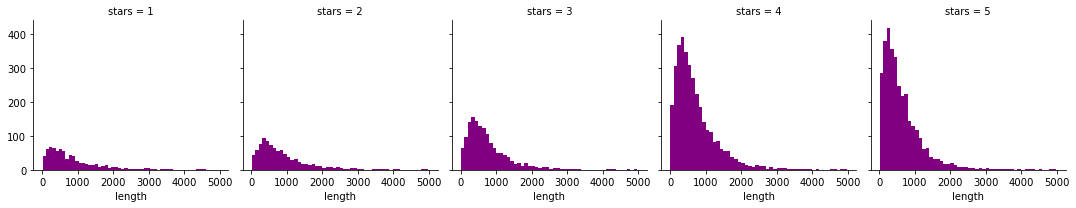

In [5]:
graph = sns.FacetGrid(data=data,col='stars') # seaborn kütüphanesindeki FacetGrid nesnesi ile boş bir grid oluşturduk  

graph.map(plt.hist,'length',bins=50,color='purple') # graph.map yaklaşımı ile grid üzerine histogram oluşturduk

<AxesSubplot:xlabel='stars', ylabel='length'>

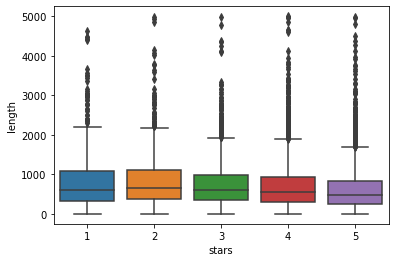

In [6]:
sns.boxplot(x="stars", y="length", data=data)

Yıldız sayısı ile inceleme uzunluğu arasında doğru bir orantı olduğunu görmekteyiz. Müşterilerin yalnızca olumlu olarak etkilendiklerinde detaylı incelemeler yaptığını düşünmek mantıklıdır. 

Veride, diğer kullanıcıların incelemelere bıraktıkları "cool" "useful" ve"funny" (havalı, kullanışlı ve komik) ifadeleri bulunmakta. Bu bir kullanıcının yaptığı incelemeye diğer kullanıcıların nasıl bir yaklaşım sergiledikleri hakkında fikrimiz olması açısından yararlıdır.

Şimdi incelemeye verilen yıldızları gruplayarak yıldızlara göre bu üç ifadenin ortalama değerini bulalım. 

In [7]:
stval = data.groupby('stars').mean() # veriyi yıldızlara göre gruplayıp ortalama değerini bulduk. 

stval

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Sonuçta şu yorumları yapmak mantıklı olacaktır, 

- Bütün yıldızların ortalama "useful" değeri yakın ancak en düşük üç yıldız değeri çıkmıştır. Bu sebeple bütün incelemeler diğer kullanıcılar tarafından yararlı bulunmuştur ancak en az yararlı bulunan yorumlar genel olarak üç yıldız verilerek yapılan yorumlardır. 


- Bir yıldız verilerek yapılan incelemerin ortalama "funny" değeri diğer yıldızlara göre yüksek ancak ortalama "cool" değeri ise en düşük çıkmıştır. Bu sebeple bir yıldız veren kullanıcı yorumları diğer yorumlara göre daha komik ancak en az havalı bulunmuştur. 

Cool, Useful ve Funny değerleri arasındaki korelasyona bakalım. 

In [8]:
stval.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


Böylece 

Aşağıdakiler arasında negatif korelasyonun var olduğunu görebiliriz:

- Cool ve Useful
- Cool ve Funny
- Cool ve Length

Bu nedenle, cool olarak işaretlenen incelemelerin kısa olma eğiliminde olduğunu, başkaları için pek yararlı olmadığını ve komik bulunmadığını söyleyebiliriz. 

Aşağıdakiler arasında ise pozitif bir korelasyon vardır: 

- Funny ve Useful    
- Funny ve Length
- Useful ve Length  

Bu nedenle, daha uzun incelemelerin eğlenceli ve faydalı olma eğiliminde olduğunu söyleyebiliriz.

# Veri kümesini sınıflandırmak, incelemelere ve yıldızlara bölmek 


Yelp veri çerçevesinin sütunlarını içeren, ancak yalnızca 1, 3 veya 5 yıldızlı incelemeler için data_classes adında bir veri çerçevesi oluşturalım ve yeni veriye head() fonksiyonu ile bir göz atalım. 

In [9]:
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]

data_classes.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


Yeni verinin satır ve sütun sayılarına bakalım. 

"shape" işlevi, bir dizinin şeklini döndürür. Shape bir tamsayı demetidir. Bu sayılar, karşılık gelen dizi boyutunun uzunluklarını belirtir. Başka bir deyişle: Bir dizinin "şekli", eksen (boyut) başına eleman sayısını içeren bir tanımlama grubudur.

In [10]:
print(data_classes.shape)

(5547, 11)


Görüldüğü gibi 1000 satır 5547 'e  düşmüştür.

**1 - Features**

Makine öğreniminin kökleri istatistiksel analizlere dayanır. Bu sebeple, makine öğrenimindeki kavramları istatistikteki karşılıklarına bakarak anlamak genellikle oldukça basittir.

İstatistikte, belirli bir istatistiksel birim ile ilişkili özellikleri gösteren "variables" (değişkenler) hakkında konuşurken, Makine öğreniminde "Features" (özellikler) hakkında konuşuruz. 

İki disiplinin terminolojisinin çok benzer olduğunu görebiliriz ve genellikle birinden veya diğerinden gelen terimleri birbirinin yerine kullanmak mümkündür. Böylece özelliklerin değişkenlerin benzeri olduğunu söyleyebiliriz.

**Kavramın anlamını sezgisel olarak anlamak için gözlemlerin özelliklerini belirlemeye çalıştığımız birkaç senaryo görelim.**

Özellikleri kavramsallaştırmanın kolay bir yolu, bunların bazı sensör ölçümlerinin sonucu olduğunu hayal etmektir. Her on beş dakikada bir havanın sıcaklığını kaydeden bir termometremiz olduğunu düşünelim. Kaydettikten sonra, bir kağıda yazarsak:

In [130]:
display(Image(url='https://www.baeldung.com/wp-content/uploads/sites/4/2020/07/thermometer.png', width=300, unconfined=True))

Termometre, sonucu bir gözlem tablosu oluşturan ölçümler gerçekleştirir. **Her ölçümle ilişkili değer, istatistiksel analizde makine öğrenimi terminolojisine sahip bir "sıcaklık" özelliğine veya bir özelliğe karşılık gelir.**

Başka bir senaryo düşünelim. Bir polis radarı, arabaların caddede gitme hızını ölçer:

In [133]:
display(Image(url='https://www.baeldung.com/wp-content/uploads/sites/4/2020/07/cars-768x472-1.png', width=300, unconfined=True))

Sonuç, her satırın bir aracın plakasını ve radar tarafından ölçülen o aracın hızını içeren bir bilgisayardaki bir dosyadır.

Bu bağlamda plakalar veri setinin ID veya indeksini, hız ise özellikleri oluşturmaktadır. Bununla birlikte, belirli bir caddeyi hangi arabaların kullandığını öğrenmek istiyorsak, plakaları sadece indeksler olarak değil, özellikler olarak kullanmamıza izin verilir.

Gördüğümüz örnekler bize **“özellik” terimini bir gözlem veya ölçümün sonucunu yansıtmak için kullandığımızı gösteriyor.** Neyin bir ölçüm oluşturduğuna dair özel bir kısıtlama yoktur. Sonuç olarak, yeni bir göreve yaklaşırken, normal olarak, onunla ilgili ölçümler yapmamıza izin verecek şekilde onu tanımlamak için biraz zaman harcamamız gerekir.

**Features (Özellik) Sınıfları**

Bununla birlikte, kendimizi yönlendirmek için takip edebileceğimiz özelliklerin seçimiyle ilgili bazı ortak buluşsal yöntemler vardır. Bunlardan biri, belirli bir görev için uygun olan özellik sınıfının tanımlanmasını içerir. 

Features, bir platformdan veya dilden diğerine biraz değişen çeşitli türlerde veya sınıflarda olabilir. Genel programlama dilleri için en yaygın veri türlerinin tümü, özellikler için geçerli sınıflardır. Bunlar:

- Tamsayılar, kayan sayılar ve **gerçek sayıların diğer hesaplanabilir yaklaşımları**


- "Merhaba dünya" gibi önceden işlenmiş **metin dizeleri**


- Nominal ve sıralı kategorilere ayırdığımız **kategoriler**

**Gerçek Sayıların Yaklaşımı**

Makine öğrenimi veri kümelerindeki en yaygın özellik, integers, floats, doubles veya gerçek sayılara yaklaşan diğer ilkel veri türlerinden oluşur. Bunlar, belirli bir aletle yaptığımız nicel ölçümlerin sonuçlarıdır.

Sayısal veri türleri, makine öğrenmesinde en sık kullanılan özelliklerdir. Sonuç olarak, çoğu makine öğrenme tekniği onlara uygulanabilir.

Bu tekniklerden biri örneğin lineer regresyondur. Hedef değişkenin değerini tahmin etmek için sayısal bir özellik kullanarak doğrusal regresyon gerçekleştirebiliriz. 

**Metin dizeleri**

Makine öğrenimi görevleri için başka bir tipik özellik, metin veya daha doğrusu bir dize nesnesidir. Dizeler, makine öğrenimi için Doğal Dil İşleme (Natural Language Processing) alt sektöründe kullanılan birincil özelliktir.

Metinleri makine öğrenimi uygulamaları için özellikler olarak ele alma şeklimiz, sayısal özelliklerde olduğu kadar doğrudan değildir. Aslında metinleri doğrudan özellik olarak ele almak ve aynı zamanda bir metin corpusundan yararlı bir şey çıkarmak mümkün değildir. Bunun iki ana nedeni vardır. 

**Birincisi kombinatorik ile ilgili.** Bir dizgedeki her karakteri, alfabenin 26 harfinden birinin değerini alabilen rastgele bir değişken olarak ele almaya çalışabiliriz. Bunu yapsaydık, n uzunluğundaki her dize 26^n olası değerden birini alabilirdi, bu da arama alanını hızlı bir şekilde yönetilemez hale getirir:

In [138]:
display(Image(url='https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-e5d62d27cd7ad739c7c66522fcfe3d1e_l3.svg', width=150, unconfined=True))

Ve bu argüman boşlukları veya diğer karakterleri dikkate almaz. **İkinci neden, metinlerin sanıldığı kadar yüksek olmayan bilgi içeriği ile ilgilidir.** Bu bağlamda, aşağıdaki metinler corpus 'unu ele alalım:

In [140]:
display(Image(url='https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-d9a4c3c0a1e48a37e0f165767fc0ec60_l3.svg', width=200, unconfined=True))

Metinlerin bir kalem ve bir masadan bahsettiğini bildiğimizi varsayarsak, o zaman kelimelerin çoğunun ne kadar yararlı bilgiler içermediğini görebiliriz. Aslında aynı corpus'u daha indirgenmiş bir biçimde tanımlayabiliriz:

In [142]:
display(Image(url='https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-869bec011acaf6ea51204014a1477771_l3.svg', width=160, unconfined=True))

Bu, daha genel bir kural için özel bir durumdur: Metinler doğrudan özellik olarak kullanılmazlar, ancak bir tür ön işleme tabi tutulduktan sonra kullanılırlar. Bu ön işleme adımları, normal olarak, kök çıkarma ve lemmatizasyonun yanı sıra tokenizasyon ve vektörleştirmeyi içerir. Önceden işlenmiş metinler daha sonra veri madenciliği için özellikler(features) haline gelir, ancak orijinal formlarındaki metinler özellik değildir.

**Kategorik Özellikler**

Biraz daha zorlayıcı bir kavram, kategorik değerler veya özelliklerdir. Kategorilerin ardındaki fikir, dünyayı bölümlere ayırabilmemiz ve birbirini dışlayan sınıflara bölebilmemizdir. Bu fikri, birden çok bağlama nasıl uygulandığını görerek daha iyi anlayabiliriz.

Örnek olarak, belirli bir hasattaki elmaların rengini örneklediğimizi düşünelim:

Yeşil olan bir elmanın da kırmızı olmadığını ve bunun tersinin de tüm renk kombinasyonları için geçerli olduğunu güvenle söyleyebiliriz. Sonuç olarak “elmanın rengi” özelliğinin kategorik bir özellik olduğunu söyleyebiliriz. Bunlar için belirli bir tercih sıramız olmadığı için bu kategorilerin sırasız olduğunu da varsayabiliriz.

**2 - Labels** 

Makine öğrenimine giriş metinlerinde, bir veri kümesinin özelliklerini bir modelin girdisi olarak ve aynı veri kümesinin etiketlerini (labels) de modelin çıktısı olarak düşünmek yaygındır. Ancak bu yaklaşımın genelleme kapasitesini sınırlayan iki önemli sorunu vardır:

- etiketler normalde biz herhangi bir makine öğrenimi modelini oluşturmadan ve hatta tanımlamadan önce atanır.


- etiketler, özellikle bağımsızlıklarını sorguladığımız ve doğrulamak istediğimizde bazı modellere girdi olarak kullanılabilir.

**Targets (Hedef) Olarak Labels (Etiketler)**

Bir label, bir anlamda, keyfi olarak yüksek önem atadığımız bir veri kümesindeki bir özelliktir. Hisse senedi fiyatlarındaki değişimi ve hepsinin ait olduğu portföyün fiyatındaki değişimi incelediğimizi düşünelim: 

In [145]:
display(Image(url='https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-2070bdccd83b5f5072bc401f386a8815_l3.svg', width=240, unconfined=True))

Bu göreve bakmanın bir yolu, portföyün fiyatının, içerdiği hisse senetlerinin fiyatına bağlı olduğunu hayal etmektir. Eğer teorik beklentimiz buysa, o zaman portföy = f(hisse senetleri) formunun bir fonksiyonunu inceleyebiliriz.

Daha sonra bu işlevi denetimli öğrenme yoluyla modellemeye çalışabiliriz. Bu bağlamda, hisse senedi fiyatını özellik, portföy fiyatını da etiket olarak ele alırız.

Aynı derecede iyi bir yaklaşım, portföyün fiyatının, içerdiği hisse senetlerinin fiyatını etkilediğini hayal etmek olacaktır. Bu süreci, bir öncekinin tersi olan stoklar = g(portföy) fonksiyonu ile modelleyebiliriz. Bu bağlamda portföyün fiyatı tek özellik olacak ve hisse senedi fiyatları modelimizde beş etiket olacaktır.

Şimdi, anlatılanlara göre Yelp veri çerçevesinin sütunlarını içeren, ancak yalnızca 1, 3 veya 5 yıldızlı incelemeler içeren data_classes 'dan x ve y olmak üzere iki nesne oluşturalım. X, data_classes'ın *'metin'* sütunu yani özellikler(features) olacak ve y, data_classes'ın *'yıldızlar'* sütunu yani labels(etiketler) olacak.

In [11]:
x = data_classes['text']
y = data_classes['stars']

x ve y verilerine head() fonksiyonu ile bakalım. 

In [12]:
print(x.head())

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object


In [14]:
print(y.head())

0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


**Stop words**

Doğal bir dil işlenmeden önce genellikle filtreden geçirilen kelimelere stop words denir. Bunlar aslında herhangi bir dilde (makaleler, edatlar, zamirler, bağlaçlar vb.) en yaygın kelimelerdir ve metne fazla bilgi eklemez. İngilizce'deki birkaç stop words'e örnek olarak “the”, “a”, “an”, “so”, “what” verilebilir. 

**Stop words neden temizlenir?**

Stop words herhangi bir dilde bolca mevcuttur. Bu kelimeleri kaldırarak, önemli bilgilere daha fazla odaklanmak için metnimizden düşük seviyeli bilgileri çıkarıyoruz. Sırayla, bu tür kelimelerin çıkarılmasının, görevimiz için eğittiğimiz model üzerinde herhangi bir olumsuz sonuç göstermediğini söyleyebiliriz.

Stop words'ün kaldırılması, veri kümesi boyutunu kesinlikle azaltır ve dolayısıyla trainde yer alan daha az sayıda belirteç nedeniyle train süresini azaltır.

**Stop words her zaman temizlenir mi? Bizim için her zaman işe yaramazlar mı?**

Stop words her zaman temizlenmez.Stop words 'ün kaldırılması, büyük ölçüde gerçekleştirdiğimiz göreve ve ulaşmak istediğimiz hedefe bağlıdır. Örneğin, duygu analizi görevini gerçekleştirebilecek bir model eğitiyorsak, stop words 'ü kaldıramayabiliriz.

Örneğin, Bir **Film incelemesi: “Film hiç iyi değildi.”** olsun.

Stop words 'ün kaldırılmasından sonraki metin: **"film iyi"**

Film için yapılan incelemenin olumsuz olduğunu açıkça görebiliyoruz. Ancak, stop kelimelerinin kaldırılmasından sonra inceleme olumlu oldu, ki bu gerçek değil. Bu nedenle, burada durma sözcüklerinin kaldırılması sorunlu olabilir.


Şimdi, stopwords ve noktalama işaretlerini kaldırarak veri setini temizleyecek bir fonksiyon tanımlayacağız.

In [13]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# Vektörleştirme

**CountVectorizer**

Tahmine dayalı modelleme için metin verilerini kullanmak için, metnin belirli kelimeleri kaldıracak şekilde ayrıştırılması gerekir - bu işleme belirteçleme denir . Bu kelimelerin daha sonra makine öğrenimi algoritmalarında girdi olarak kullanılmak üzere tamsayılar veya kayan nokta değerleri olarak kodlanması gerekir. Bu işleme, özellik çıkarma (veya **vektörleştirme**) denir .

Scikit-learn kütüphanesindeki **CountVectorizer**, bir metin dokümanı koleksiyonunu bir terim / simge sayısı vektörüne dönüştürmek için kullanılır. Aynı zamanda, vektör gösterimini oluşturmadan önce metin verilerinin önceden işlenmesini sağlar. Bu işlevsellik, onu metin için oldukça esnek bir özellik temsil modülü yapar.

**Scikit-Learn'ün vektörleştiricileri hakkında**

Bildiğiniz gibi makineler, ne kadar gelişmiş olursa olsun, kelimeleri ve cümleleri insanlarla aynı şekilde anlayamaz. Belgelerin külliyatını bilgisayarlar için daha çekici hale getirmek için, önce sayısal bir yapıya dönüştürülmesi gerekir. 

**Bag-of-Words (BoW)** , bu soruna çok sezgisel bir yaklaşımdır ve yöntemler şunları içerir:

**1. Bir tür kalıp izleyerek belgeleri tokenlara ayırmak.**

Tokenlara ayırma, gereksiz sık kullanılan kelimelerin (stop-words) atılması ve kelime köklerini bulma(stemming) en yaygın kullanılan ön işleme yöntemlerindendir.

Bir metin dokümanını analiz etmek için, ilk olarak tokenlara ayırma işlemi yapılmalı ve kelime grupları elde edilmelidir.
Tüm ortak ayırıcılar, işleçler, noktalama işaretleri ve yazdırılamayan karakterler kaldırılır.
Daha sonra, en sık kullanılan kelimeleri filtrelemeyi amaçlayan stop-words filtreleme gerçekleştirilir. Örnek olarak: “ama, belki, acaba”.

Son olarak, kelime hakkında dil-bilgisel veya sözcüksel bilgiler sunan son-eklerin çıkarılmasıyla morfolojik kökün elde edilmesini amaçlayan stemming ve / veya lemmatization uygulanır. Bu araştırmada, bu adım atlanmıştır.

**2. Her tokena, belgede ve / veya külliyatta görünme sıklığıyla orantılı bir ağırlık atamak.**

Her satırın bir belgeyi temsil ettiği ve her bir sütunun bir belirteci ele aldığı bir belge terim matrisi oluşturulur.

Scikit-Learn tarafından sağlanan vektörleştirici nesneleri, kutudan çıkar çıkmaz oldukça güvenilirdir, yukarıdaki tüm adımları aynı anda verimli bir şekilde gerçekleştirmemize ve hatta token sayısı ve sıklığı ile ilgili ön işleme ve kuralları uygulamamıza izin verir. Hepsinden önemlisi, üç farklı sürüme sahiptirler (DictVectorizers gibi başka sürümler de vardır, ancak o kadar yaygın değildir):

**Count Vectorizer :** Bir tokenın belgede kaç kez göründüğünü sayar ve bu değeri ağırlığı olarak kullanır.

CountVectorizer'ı içe aktarıp ve bir CountVectorizer nesnesi oluşturacağız. 

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
cv = CountVectorizer()

**fit_transform()**

fit_transform(), train verilerini ölçekleyebilmemiz ve ayrıca bu verilerin ölçekleme parametrelerini öğrenebilmemiz için train verilerinde kullanılır. Fit yöntemi, verilerimizde bulunan özelliklerin her birinin ortalamasını ve varyansını hesaplıyor. Dönüştürme yöntemi, ilgili ortalama ve varyansı kullanarak tüm özellikleri dönüştürüyor.

CountVectorizer nesnesinde fit_transform yöntemini kullanalım ve x'i ('metin' sütunu) iletelim. x'in üzerine yazarak bu sonucu kaydedelim. 

In [87]:
x = cv.fit_transform(x)

AttributeError: lower not found

**Verileri train ve test kümesine bölmek:**

Bunun için train_test_split işlevi kullanalım. 

In [2]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

NameError: name 'train_test_split' is not defined

**Modelleme**

Şimdi hangisinin en iyi performansı verdiğini görmek için birden fazla Makine Algoritması kullanacağız.

**1- Multinomial (Çok Terimli) Naive Bayes** 

Çok terimli Naive Bayes algoritması, çoğunlukla Doğal Dil İşleme'de (NLP) kullanılan olasılıksal bir öğrenme yöntemidir. Algoritma Bayes teoremine dayanır ve bir e-posta veya gazete makalesi gibi bir metnin etiketini tahmin eder. Belirli bir örnek için her etiketin olasılığını hesaplar ve ardından çıktı olarak en yüksek olasılığa sahip etiketi verir.

Naive Bayes sınıflandırıcı, tüm algoritmaların ortak bir ilkeyi paylaştığı ve sınıflandırılan her bir özelliğin başka bir özellikle ilgili olmadığı birçok algoritmanın bir koleksiyonudur. Bir özelliğin varlığı veya yokluğu, diğer özelliğin varlığını veya yokluğunu etkilemez.


**Multinomial Naive Bayes nasıl çalışır?** 

Naive Bayes, metin madenciliği için ve birden çok sınıfla ilgili problemlerde kullanılan güçlü bir algoritmadır. Naive Bayes teoreminin işleyişini anlamak için önce Bayes teoremi kavramını anlamak önemlidir. 

Thomas Bayes tarafından formüle edilen Bayes teoremi, bir olayla ilgili koşulların ön bilgisine dayanarak bir olayın meydana gelme olasılığını hesaplar. Aşağıdaki formüle dayanmaktadır:

**P(A|B) = P(A) * P(B|A)/P(B)**

P(A) terimine A için önsel olasılık veya marjinal olasılık adı verilir. Bu önseldir, çünkü B olayı hakkında önceden herhangi bir bilgiyi içermemektedir.

P(A|B) terimi verilmiş B için Anın koşullu olasılığı adını alır.

P(B|A) terimi verilmiş A için Bnin koşullu olasılığı adını taşır.

P(B) terimi B olayı için 'önsel' olasılıktır veya Bnin marjinal olasılığıdır ve matematiksel rolü normalize eden bir sabittir.
Bu şekildeki Bayes teoremini, fazla matematiksel olmadan, sezgiye dayanarak şöyle açıklayabiliriz: Bayes teoremi eğer B gözlemlenmis ise, A gözlemi hakkındaki inançların ne şekilde güncelleştirilebileceğini ortaya çıkartır.

Bu formül, metindeki etiketlerin olasılığını hesaplamaya yardımcı olur.

- Gauss yerine Multinomial Naive Bayes kullanıyoruz çünkü seyrek(sparse) verilerle Gauss Naive Bayes varsayımları karşılanmaz ve veriler üzerinde basit bir gauss uyumu bize iyi bir uyum veya tahmin sağlamaz.

(not: seyrek veri, değerlerin çoğunun sıfır olduğu anlamına gelir.) 

Şimdi Multinomial modeli MultinomialNB() fonksiyonu ile tanımlayıp eğiteceğiz. Ve ardından training setleri fit edeceğiz. 

In [27]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

**Predictions**

Test setini tahmin etmek için oluşturduğumuz mnb modelinde predict metodunu kullanacağız. 

In [28]:
predmnb = mnb.predict(x_test)

Şimdi bu tahminleri ve y_test'i kullanarak bir confusion matrisi ve sınıflandırma raporu oluşturacağız. 

- Bir sınıflandırma algoritmasından tahminlerin kalitesini ölçmek için bir sınıflandırma raporu(Classification Report) kullanılır. 

**Accuracy classification score** 

Çoklu  etiket sınıflandırmasında, bu işlev alt küme doğruluğunu hesaplar: bir numune için tahmin edilen etiket kümesi, y_true içindeki karşılık gelen etiket kümesiyle tam olarak eşleşmelidir.

*Açık hali şu şekildedir:*

sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None) 

In [29]:
print("Multinomial Naive Bayes için Confusion Matrix :")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Multinomial Naive Bayes için Confusion Matrix :
[[ 75  49  38]
 [  7 180 105]
 [ 12  45 599]]
Score: 76.94
Classification Report:               precision    recall  f1-score   support

           1       0.80      0.46      0.59       162
           3       0.66      0.62      0.64       292
           5       0.81      0.91      0.86       656

    accuracy                           0.77      1110
   macro avg       0.75      0.66      0.69      1110
weighted avg       0.77      0.77      0.76      1110



- **Accuracy -** En sezgisel performans ölçüsüdür ve sadece doğru tahmin edilen gözlemin toplam gözlemlere oranıdır. Doğruluğumuz yüksekse modelimizin en iyisi olduğu düşünülebilir. Ancak tek başına yeterli değildir, özellikle eşit dağılmayan unbiased veri kümelerinde model doğruluğu tek başına yeterli değildir. Örneğin kanser olan ve olmayan hastaların olduğu 100 kişilik bir veri kümemiz olduğunu düşünelim. Tüm hastalar içinde sadece 10 tanesinde kanser teşhisi konulmuştur. Böyle bir durumda kanser olan ancak teşhis edilemeyen (False Negative) hastalar olmasını istemeyiz. Bu nedenle diğer metriklerin sonuçlarını da birlikte değerlendirmeliyiz.

   *Accuracy değeri, 0.77 çıkmıştır. Score ise 76.94 çıkmıştır* 
    

- **Precision -** Tahminlerinizin yüzde kaçı doğru çıktı? 
Doğru tahmin edilen Positive gözlemlerin toplam tahmin edilen Positive gözlemlere oranıdır. Precision değeri özellikle False Positive tahminlemenin maliyeti yüksek olduğu durumlarda çok önemlidir. Örneğin mail kutunuza gelmesi gereken mailleri eğer modeliniz spam olarak işaretlerse (FP) bu durumda almanız gereken önemli mailleri görememiş olur ve sizin için kayıp yaratan bir durumda kalırsınız. Bu durumda Kesinlik değerinin yüksek olması bizim için model seçiminde önemli bir kriterdir. 
   
   **True Positives/(True Positives + False Positives) şeklinde hesaplanır.**
   
   *Precision değeri en yüksek üçüncü modelde 0.81 olarak çıkmıştır ancak birinci model ile arasında fazla fark yoktur.* 
   
 
- **Recall (Sensitivity) -** Pozitif vakaların yüzde kaçını yakaladınız? Positive olarak tahmin etmemiz gereken işlemlerin ne kadarını Positive olarak tahmin ettiğimizi gösteren bir metriktir. Sensitivity değeri de False Negative olarak tahminlemenin maliyetinin yüksek olduğu durumlarda bize yardımcı olacak bir metriktir. Mümkün olduğunca yüksek olması gereklidir. 

    **True Positives/(True Positives + False Negatives) şeklinde hesaplanır.**

    *Sensitivity değeri de en yüksek üçüncü modelde 0.91 olarak çıkmıştır.* 


- **F1 Score -** Olumlu tahminlerin yüzde kaçı doğruydu? Precision ve Sensitivity değerlerinin harmonik ortalamasını göstermektedir. Basit bir ortalama yerine harmonik ortalama olmasının sebebi ise uç durumları da gözardı etmememiz gerektiğidir. Eğer basit bir ortalama hesaplaması olsaydı Precision değeri 1 ve Recall değeri 0 olan bir modelin F1 Score’u 0.5 olarak gelecektir ve bu bizi yanıltacaktır. Accuracy yerine F1 Score değerinin kullanılmasının en temel sebebi eşit dağılmayan veri kümelerinde hatalı bir model seçimi yapmamaktır. Ayrıca sadece False Negative ya da False Positive değil tüm hata maliyetlerini de içerecek bir ölçme metriğine ihtiyaç duyulduğu içinde F1 Score bizim için çok önemlidir.

    F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    
    *F1 Score da en yüksek üçüncü modelde 0.86 olarak çıkmıştır.* 
    
    
- **Support -** Belirtilen veri kümesindeki sınıfın gerçek oluşumlarının sayısıdır. Training verilerindeki dengesiz support, sınıflandırıcının rapor edilen puanlarındaki yapısal zayıflıkları gösterebilir ve tabakalı örnekleme veya yeniden dengeleme ihtiyacını gösterebilir. Support, modeller arasında değişmez, bunun yerine değerlendirme sürecini teşhis eder.

    *Support birinci sınıfta 162, ikinci sınıfta 292 ve üçüncü sınıfta 656 çıkmıştır. Bu sonuca göre test setinde birinci sınıftan 162, ikinci sınıftan 292 ve üçüncü sınıftan ise 656 nesne bulunur.* 
    
    **Sonuç olarak modelin %77 oranında doğruluk gösterdiği dikkate alınarak model performansının zayıf olduğu gözükmektedir. Bunun nedenlerinden biri, verilerin dengesizliği olabilir, yani üçüncü sınıfın birçok nesnesi ancak birinci ve ikinci sınıfın birkaç örneği vardır.** 

**2- Random Forest Classifier**










Random Forest, adından da anlaşılacağı gibi, bir topluluk olarak çalışan çok sayıda bireysel karar ağacından oluşur. Random Forest'daki her bir ağaç bir sınıf tahmini yapar ve en çok oyu alan sınıf modelimizin tahmini olur.

*Tahminde Bulunan Random Forest Modelinin Görselleştirilmesi*

In [27]:
from IPython.core.display import Image, display
display(Image(url='https://miro.medium.com/max/1052/1*VHDtVaDPNepRglIAv72BFg.jpeg', width=300, unconfined=True))

Random Forest' ın ardındaki temel kavram basit ama güçlü bir kavramdır - kalabalıkların bilgeliği. Veri biliminde random forest modelinin bu kadar iyi çalışmasının nedeni şudur:

- Bir komite olarak çalışan çok sayıda göreceli olarak ilişkisiz model (ağaçlar), bireysel kurucu modellerin herhangi birinden daha iyi performans gösterecektir. 

Modeller arasındaki düşük korelasyon anahtardır. Tıpkı düşük korelasyonlu yatırımların (hisse senetleri ve tahviller gibi) parçalarının toplamından daha büyük bir portföy oluşturmak için bir araya gelmesi gibi, ilişkisiz modeller de bireysel tahminlerin herhangi birinden daha doğru olan toplu tahminler üretebilir. Bu harika etkinin nedeni, ağaçların birbirlerini bireysel hatalarından korumalarıdır (sürekli aynı yönde hata yapmadıkları sürece). Bazı ağaçlar yanlış olabilirken, diğer birçok ağaç doğru olacaktır, böylece bir grup olarak ağaçlar doğru yönde hareket edebilir. Bu nedenle, rastgele ormanın iyi performans göstermesi için ön koşullar şunlardır: 

**1 -** Bu özellikler kullanılarak oluşturulan modellerin rastgele tahminden daha iyi sonuç vermesi için özelliklerimizde bazı gerçek sinyaller olması gerekir.

**2 -** Bireysel ağaçlar tarafından yapılan tahminlerin (ve dolayısıyla hataların) birbirleriyle düşük korelasyona sahip olması gerekir.

**Random Forest'ın Avantaj ve Dezavantajları**

-**Avantajlar** 

    Güçlü ve son derece hassas
    
    Normalleştirmeye gerek yok

    Aynı anda birkaç özelliği işleyebilir

    Ağaçları paralel yollarla çalıştırır 

-**Dezavantajlar**

    Bazen belirli özelliklere önyargılıdırlar.
    
    Yavaş

    Doğrusal yöntemler için kullanılamaz
    
    Yüksek boyutlu veriler için çok iyi bir yöntem değil 

Şimdi Random Forest modeli RandomForestClassifier() fonksiyonu ile tanımlayıp eğiteceğiz. Ve ardından training setleri fit edeceğiz. 

In [39]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)

RandomForestClassifier()

**Predictions**

Test setini tahmin etmek için oluşturduğumuz rmfr modelinde predict metodunu kullanacağız.

In [41]:
predrmfr = rmfr.predict(x_test)

Şimdi bu tahminleri ve y_test'i kullanarak bir confusion matrisi ve sınıflandırma raporu oluşturacağız.

In [42]:
print("Random Forest için Confusion Matrix :")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Random Forest için Confusion Matrix :
[[ 31  34  97]
 [  1 109 182]
 [  1  19 636]]
Score: 69.91
Classification Report:               precision    recall  f1-score   support

           1       0.94      0.19      0.32       162
           3       0.67      0.37      0.48       292
           5       0.70      0.97      0.81       656

    accuracy                           0.70      1110
   macro avg       0.77      0.51      0.54      1110
weighted avg       0.72      0.70      0.65      1110



   *Accuracy 0.70 çıkmıştır. Modelin doğruluğu Multinomial Naive Bayes 'e göre bir miktar düşmüştür. Score ise 69.91 olmuştur.* 

   *Precision değeri en yüksek birinci sınıfta 0.94 olarak çıkmıştır.*

   *Sensitivity değeri en yüksek üçüncü sınıfta 0.97 olarak çıkmıştır.*

   *F1 Score en yüksek üçüncü sınıfta 0.81 olarak çıkmıştır.* 
   
   *Support birinci sınıfta 162, ikinci sınıfta 292 ve üçüncü sınıfta 656 çıkmıştır. Bu sonuca göre test setinde birinci sınıftan 162, ikinci sınıftan 292 ve üçüncü sınıftan ise 656 nesne bulunur.*

**3- Decision Tree** 

Decision Tree (Karar ağacı) yöntemi hem classification (Sınıflandırma) hem de regression (regresyon) problemlerinde kullanılan makine öğrenmesinin en popüler algoritmalarından biridir. Aynı zamanda veri madenciliği alanındada sıkça kullanılır. Karar ağaçları genellikle insan seviyesinde düşünülebilecek düzeydedir, böylece verileri anlamak ve bazı iyi yorumlar yapmak ve görselleştirmek oldukça zahmetsizdir.

Karar ağacı recursively (yenilemeli) bir işlemdir, adından da anlaşılacağı üzere bir ağaç yapısı kullanılır. Tek bir düğüm ile başlar ve yeni sonuçlara dallanarak bir ağaç yapısı oluşturulur. Algoritma çalıştığında girilen değer düğümlere bakılarak belli bir yolda ilerler ve bir sonuç verir.

3 tane düğüm çeşidi vardır.

**Chance Node (Şans Düğümü):** Daire ile gösterilir. Birden çok olası yol belirtir.

**Decision Node (Karar Düğümü):** Dikdörtgen ile gösterilir. Bir karar verileceğini belirtir.

**End Node (Uç Düğümü):** Üçgen ile gösterilir. Bir sonuç belirtir. 

**Karar Ağacının Avantaj ve Dezavantajları**

- **Avantajlar**

    Kolay
    
    Şeffaf süreç
    
    Hem sayısal hem de kategorik verilere işlenebilir

    Veriler ne kadar büyük olursa, sonuç o kadar iyi olur
    
    Hızlı
    

- **Dezavantajlar**

    Overfitting olabilir. 
    
    Pruning(budama) işlemi büyük

    Optimizasyon garantisi yok

    Karmaşık hesaplamalar

**Decision Tree ve Random Forest arasındaki farklar**

In [65]:
from IPython.core.display import Image, display
display(Image(url='https://miro.medium.com/max/5752/1*5dq_1hnqkboZTcKFfwbO9A.png', width=900, unconfined=True))

Karar ağaçları, random forest'a kıyasla çok kolaydır. Bir karar ağacı bazı kararları birleştirir, oysa random forest birkaç karar ağacını birleştirir. Bu nedenle, uzun ama yavaş bir süreçtir.

Oysa bir karar ağacı hızlıdır ve özellikle doğrusal olan büyük veri kümelerinde kolayca çalışır. Random forest modeli sıkı bir eğitim gerektirir. Bir proje ortaya koymaya çalışırken birden fazla modele ihtiyacınız olabilir. Böylece, çok sayıda random forest, daha fazla zaman demektir.

**Sonuç olarak gereksinimlerinize bağlıdır. Bir model üzerinde çalışmak için daha az zamanınız varsa, bir karar ağacı seçmek zorundasınız. Bununla birlikte, istikrarlı ve güvenilir tahminler istiyorsanız random forest daha iyi bir seçim olacaktır.**

Şimdi Random Forest modeli, DecisionTreeClassifier() fonksiyonu ile tanımlayıp eğiteceğiz. Ve ardından training setleri fit edeceğiz.

In [45]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

**Predictions**

Test setini tahmin etmek için oluşturduğumuz dt modelinde predict metodunu kullanacağız.

In [46]:
preddt = dt.predict(x_test)

Şimdi bu tahminleri ve y_test'i kullanarak bir confusion matrisi ve sınıflandırma raporu oluşturacağız.

In [47]:
print("Decision Tree için Confusion Matrix:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Decision Tree için Confusion Matrix:
[[ 59  49  54]
 [ 37 140 115]
 [ 37  98 521]]
Score: 64.86
Classification Report:               precision    recall  f1-score   support

           1       0.44      0.36      0.40       162
           3       0.49      0.48      0.48       292
           5       0.76      0.79      0.77       656

    accuracy                           0.65      1110
   macro avg       0.56      0.55      0.55      1110
weighted avg       0.64      0.65      0.64      1110



   *Accuracy değeri oldukça düşerek 0.65 çıkmıştır. Modelin doğruluğu Multinomial Naive Bayes ve Random Forest 'e göre oldukça düşmüştür. Score değeri ise 64.96 'a düşmüştür.* 

   *Precision değeri en yüksek üçüncü sınıfta 0.76 olarak çıkmıştır.*

   *Sensitivity değeri en yüksek üçüncü sınıfta 0.79 olarak çıkmıştır.*

   *F1 Score en yüksek üçüncü sınıfta 0.77 olarak çıkmıştır.* 
   
   *Support birinci sınıfta 162, ikinci sınıfta 292 ve üçüncü sınıfta 656 çıkmıştır. Bu sonuca göre test setinde birinci sınıftan 162, ikinci sınıftan 292 ve üçüncü sınıftan ise 656 nesne bulunur.*

**4- Support Vector Machines**

Support Vector Machines, belirli bir gruba (veya kategoriye) ait vektörler ile ona ait olmayan vektörler arasındaki en iyi karar sınırını belirleyen bir algoritmadır.

Her türlü veriyi kodlayan her türlü vektöre uygulanabilir. Bu, SVM metin sınıflandırmasının gücünden yararlanmak için metinlerin vektörlere dönüştürülmesi gerektiği anlamına gelir.

Vektörler, bir uzayda bir dizi koordinatı temsil eden (bazen çok büyük) sayı listeleridir.

Böylece, uzayı *iki alt uzaya* bölen en iyi “çizginin” (veya en iyi hiper düzlemin) nereye çizileceğine SVM karar verir: biri *verilen kategoriye ait vektörler* için, diğeri ise *kendisine ait olmayan vektörler için.*

Böylece metinlerimizden mümkün olduğu kadar çok bilgiyi kodlayan vektör temsillerini bulabilirsek, SVM algoritmasını metin sınıflandırma problemlerine uygulayabilir ve çok iyi sonuçlar elde edebiliriz.

Örneğin, aşağıdaki grafikteki mavi daireler, bir SaaS (hizmet olarak yazılım, kullanıcıların bulut tabanlı uygulamalara İnternet üzerinden bağlanmasını ve bunları İnternet üzerinden kullanmasını sağlar. E-posta, takvim ve ofis araçları (örn. Microsoft Office 365) bu uygulamalara örnek olarak gösterilebilir) ürününün Fiyatlandırmasından bahseden eğitim metinlerinin temsilidir ve kırmızı üçgenler, bundan bahsetmeyen eğitim metinlerinin temsilleridir.

In [62]:
display(Image(url='https://d33wubrfki0l68.cloudfront.net/6735c4ce2eaafc5e93ba22106351bba31f3ef83a/c6c7b/static/fd30f2599d2ae6afcedbe92699414a32/40f84/svm-representations-training-text.png', width=600, unconfined=True))

In [ ]:
En iyi karar sınırı şöyle görünür: 

In [59]:
display(Image(url='https://d33wubrfki0l68.cloudfront.net/e83782e076a5aeb995f2b56746b74be3bdb37252/99231/static/e7ec71eb361bf75bd69d70124a62fe75/40f84/svm-best_hyperplane.png', width=600, unconfined=True))

**Sonuç olarak**

Algoritma, analiz etmek istediğiniz kategori için karar sınırını belirlediğine göre, yalnızca sınıflandırmak istediğiniz tüm metinlerin temsillerini elde etmeniz ve bu temsillerin sınırın hangi tarafına düştüğünü kontrol etmeniz yeterlidir.

*İlgilendiğimiz veri olan Yelp 'e geri dönersek,* 

Support Vector Machines modeli, SVC fonksiyonu ile tanımlayıp eğiteceğiz. Ve ardından training setleri fit edeceğiz. 

random_state parametresi, verilerin train ve test endekslerine bölünmesine karar verecek olan dahili rasgele sayı üretecini başlatmak için kullanılır. Random_state'i sabit bir değere ayarlamak, kodu her çalıştırdığınızda aynı rastgele sayı dizisinin oluşturulmasını garanti eder. R 'da bulunan set.seed fonksiyonunun benzeridir. 

In [51]:
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)

SVC(random_state=101)

**Predictions**

Test setini tahmin etmek için oluşturduğumuz svm modelinde predict metodunu kullanacağız.

In [52]:
predsvm = svm.predict(x_test) 

Şimdi bu tahminleri ve y_test'i kullanarak bir confusion matrisi ve sınıflandırma raporu oluşturacağız.

In [53]:
print("Support Vector Machines için Confusion Matrix:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Support Vector Machines için Confusion Matrix:
[[ 31  23 108]
 [  5 122 165]
 [  1  19 636]]
Score: 71.08
Classification Report:               precision    recall  f1-score   support

           1       0.84      0.19      0.31       162
           3       0.74      0.42      0.54       292
           5       0.70      0.97      0.81       656

    accuracy                           0.71      1110
   macro avg       0.76      0.53      0.55      1110
weighted avg       0.73      0.71      0.67      1110



   *Accuracy değeri Random Forest 'e epey (0.70) yakın, 0.71 çıkmıştır. Modelin doğruluğu Random Forest 'e oldukça yakındır. Score ise 71.08 çıkmıştır* 

   *Precision değeri en yüksek birinci sınıfta 0.84 olarak çıkmıştır.*

   *Sensitivity değeri en yüksek üçüncü sınıfta 0.97 olarak çıkmıştır.*

   *F1 Score en yüksek üçüncü sınıfta 0.81 olarak çıkmıştır.* 

 **5- Gradient Boosting Classifier**

Gradient Boosting Classifier (Gradyan artırma sınıflandırıcıları), güçlü bir tahmine dayalı model oluşturmak için birçok zayıf öğrenme modelini bir araya getiren bir grup makine öğrenimi algoritmasıdır. Karar ağaçları genellikle gradyan artırma yapılırken kullanılır. Gradyan artırma modelleri, karmaşık veri kümelerini sınıflandırmadaki etkinlikleri nedeniyle popüler hale geliyor ve son zamanlarda birçok Kaggle veri bilimi yarışmasını kazanmak için kullanılıyor. 

Python makine öğrenimi kitaplığı Scikit-Learn, XGBoost dahil olmak üzere gradyan artırma sınıflandırıcılarının farklı uygulamalarını destekler. 

**Gradient Boosting’in Arkasındaki Sezgi**

Gradyan artırmanın ardındaki mantık basittir (matematiksel notasyon kullanmadan sezgisel olarak anlaşılabilir.) 

Doğrusal regresyonun temel bir varsayımı, artıklarının toplamının 0 olmasıdır, yani artıkların sıfır etrafında rastgele yayılması gerekir.

In [74]:

display(Image(url='https://devhunteryz.files.wordpress.com/2018/07/9cb5a-1mbstjwvk-ylvpvgyjw-1da.png?w=840', width=800, unconfined=True))


Şimdi bu kalıntıları, tahmin modelimizin yaptığı hatalar olarak düşünürsek, her ne kadar, ağaç temelli modeller (buradaki gradyanımızı geliştirmek için temel modeller olarak karar ağacını düşünmek) bu varsayımlara dayanmıyor olsa da, bu varsayım hakkında mantıklı düşünürsek, eğer kalıntı kalıbı görebiliyorsak; 0 civarında, bu modeli bir modele uyacak şekilde kullanabiliriz. 

Bu nedenle, gradyan artırma algoritmasının ardındaki sezgi, artıklardaki örüntüleri tekrar tekrar kullanmak ve zayıf tahminlerle bir modeli güçlendirmek ve daha iyi hale getirmektir. Kalıntıların modellenebilecek herhangi bir örüntü olmadığı bir aşamaya ulaştığımızda, modelleme artıklarını durdurabiliriz (aksi takdirde overfitting'e yol açabilir). Algoritmik olarak, kayıp fonksiyonunu en aza indiririz, böylece test kaybı en düşük seviyeye ulaşır.

**Özetle;**

- İlk önce veriler basit modellerle modellenir ve hatalar için veriler analiz edilir


- Bu hatalar, basit bir modelle sığması zor veri noktalarını gösterir 


- Daha sonra modeller için, özellikle onları doğru bir şekilde elde etmek için veriye sığması zor olanlara odaklanırız


- Sonunda, tüm tahminleri her bir belirleyiciye biraz ağırlık vererek birleştiririz 

Aynı mantığın daha teknik bir alıntısı, ‘Muhtemelen Yaklaşık Doğru: Karmaşık Bir Dünyada Öğrenme ve İyileştirme için Doğanın Algoritmaları’ kitabında yazılmıştır: (Probably Approximately Correct: Nature's Algorithms for Learning and Prospering in a Complex World, Leslie Valiant)

“Fikir, zayıf öğrenme yöntemini birkaç kez hipotezler elde etmek için kullanmaktır; her biri, öncekilerin zor ve yanlış sınıflandırılmış olduğu örneklere odaklanmıştır. Ancak, bunun nasıl yapılabileceği hiç de belli değil.”

In [1]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
"""# parametre değerlendirmesi
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

NameError: name 'x_train' is not defined

**6- K - Nearest Neighbor Classifier**

K - Nearest Neighbor Classifier (K - en yakın komşuluk) (KNN) algoritması, uygulaması kolay gözetimli öğrenme algoritmalarındandır. Hem sınıflandırma hem de regresyon problemlerinin çözümünde kullanılıyor olmakla birlikte, endüstride çoğunlukla sınıflandırma problemlerinin çözümünde kullanılmaktadır.

KNN algoritmaları, 1967 yılında T. M. Cover ve P. E. Hart tarafından önerilmiştir. Algoritma, sınıfları belli olan bir örnek kümesindeki verilerden yararlanılarak kullanılmaktadır. Örnek veri setine katılacak olan yeni verinin, mevcut verilere göre uzaklığı hesaplanıp, k sayıda yakın komşuluğuna bakılır. Uzaklık hesapları için genelde 3 tip uzaklık fonksiyonu kullanılmaktadır:

“Euclidean” Uzaklık

“Manhattan” Uzaklık

“Minkowski” Uzaklığı’dır.


In [82]:
display(Image(url='https://miro.medium.com/max/357/1*IxvVTCXAUsDTsXop6kNJjA.png', width=800, unconfined=True))

KNN; eski, basit ve gürültülü eğitim verilerine karşı dirençli olması sebebiyle en popüler makine öğrenme algoritmalarından biridir. Fakat bunun yanında dezavantajı da mevcuttur. Örneğin, uzaklık hesabı yaparken bütün durumları sakladığından, büyük veriler için kullanıldığında çok sayıda bellek alanına gereksinim duymaktadır.

**KNN algoritmasının adımları:**

İlk olarak k parametresi belirlenir. Bu parametre verilen bir noktaya en yakın komşuların sayısıdır. Örneğin: k=2 olsun. Bu durumda en yakın 2 komşuya göre sınıflandırma yapılacaktır.

Örnek veri setine katılacak olan yeni verinin, ilgili uzaklık fonksiyonları yardımıyla mevcut verilere göre uzaklığı tek tek hesaplanır. 

İlgili uzaklılardan en yakın k komşu ele alınır. Öznitelik değerlerine göre k komşu veya komşuların sınıfına atanır. Seçilen sınıf, tahmin edilmesi beklenen gözlem değerinin sınıfı olarak kabul edilir. Yani yeni veri etiketlenmiş (label) olur.

Bu algoritmayı anlamak için basit bir vakayı ele alalım. Aşağıda kırmızı dairelerin (RC) ve yeşil karelerin (GS) dağılımı verilmiştir:

In [83]:
display(Image(url='https://www.analyticsvidhya.com/wp-content/uploads/2014/10/scenario1.png', width=800, unconfined=True))

Mavi yıldızın (BS) sınıfını öğrenmek niyetindesiniz. BS, RC veya GS olabilir ve başka bir şey olmayabilir. “K” KNN algoritmasıdır ve oyu almak istediğimiz en yakın komşumuzdur. Diyelim ki K = 3. Bu nedenle, şimdi düzlemde sadece üç veri noktasını içine alacak kadar büyük, merkezi BS olan bir daire yapacağız. Daha fazla ayrıntı için aşağıdaki şemaya bakın:

In [84]:
display(Image(url='https://www.analyticsvidhya.com/wp-content/uploads/2014/10/scenario2.png', width=800, unconfined=True))

BS'ye en yakın üç noktanın tümü RC'dir. Bu nedenle, iyi bir güven düzeyi ile BS'nin RC sınıfına ait olması gerektiğini söyleyebiliriz. Burada, en yakın komşudan gelen üç oy da RC'ye gittiği için seçim çok açık hale geldi. Bu algoritmada K parametresinin seçimi çok önemlidir.

**K faktörünü nasıl seçeriz?**

Önce K algoritmasında tam olarak neyi etkilediğini anlamaya çalışalım. Son örneğe bakarsak, 6 eğitim gözleminin tamamının sabit kaldığı göz önüne alındığında, verilen bir K değeri ile her sınıfın sınırlarını yapabiliriz. Bu sınırlar, RC'yi GS'den ayıracaktır. Aynı şekilde “K” değerinin sınıf sınırları üzerindeki etkisini görmeye çalışalım. Aşağıdakiler, farklı K değerlerine sahip iki sınıfı ayıran farklı sınırlardır.

In [85]:
display(Image(url='https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement.png', width=800, unconfined=True))

Dikkatlice incelersek, artan K değeri ile sınırın daha düzgün hale geldiğini görebiliriz. K sonsuza kadar arttıkça, toplam çoğunluğa bağlı olarak sonunda tamamen mavi veya tamamen kırmızı olur. Training hata oranı ve doğrulama hata oranı, farklı K değerlerine erişmek için ihtiyacımız olan iki parametredir. Değişen bir K değerine sahip training hata oranı eğrisi aşağıdadır:

In [86]:
display(Image(url='https://www.analyticsvidhya.com/wp-content/uploads/2014/10/training-error.png', width=800, unconfined=True))

Gördüğünüz gibi, training örneği için K=1'deki hata oranı her zaman sıfırdır. Bunun nedeni, herhangi bir training veri noktasına en yakın noktanın kendisi olmasıdır. Bu nedenle, tahmin her zaman K=1 ile doğrudur. Doğrulama hatası eğrisi benzer olsaydı, K seçimimiz 1 olurdu. Değişen K değerine sahip doğrulama hatası eğrisi aşağıdadır:

In [88]:
display(Image(url='https://www.analyticsvidhya.com/wp-content/uploads/2014/10/training-error_11.png', width=800, unconfined=True))

Bu hikayeyi daha net hale getiriyor. K=1'de sınırlara fazla uyuyorduk. Bu nedenle, hata oranı başlangıçta azalır ve bir minimuma ulaşır. Minimum noktasından sonra, artan K ile artar. En uygun K değerini elde etmek için training ve doğrulamayı ilk veri kümesinden ayırabilirsiniz.

**Python 'da KNN**

**sklearn.neighbors.KNeighborsClassifier fonksiyonu**

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)  

**parametreler** 

- n_neighbors : Kneighbors sorguları için kullanılacak komşu sayısı, default=5 olarak alır. 


- weight: tahminde kullanılan ağırlık fonksiyonudur. {‘uniform’, ‘distance’} ya da callable olabilir. fonksiyon default olarak ’uniform’ alır. 

    *uniform: tek tip ağırlıklar.*
    
    *distance: mesafelerinin tersi ile ağırlık noktaları. bu durumda, bir sorgu noktasının daha yakın komşuları, uzaktaki komşulardan daha büyük bir etkiye sahip olacaktır.*
    
    *callable: bir dizi uzaklığı kabul eden ve ağırlıkları içeren aynı şekle sahip bir dizi döndüren kullanıcı tanımlı bir işlev.* 
    

- algorithm: en yakın komşuları hesaplamak için kullanılır. {'auto', 'ball_tree', 'kd_tree', 'brute'} olabilir. default olarak 'auto' alır.

    *ball_tree: BallTree için kullanılır.*
    
    *kd_tree: KDTree için kullanılır.* 
    
    *brute: brute force araması için kullanılır.* 
    
    *auto: fit yöntemine iletilen değerlere göre en uygun algoritmaya karar vermeye çalışır.* 

Şimdi K Nearest Neighbour modeli oluşturup KNeighborsClassifier fonksiyonu ile tanımlayıp eğiteceğiz. Ve ardından training setleri fit edeceğiz. 

In [89]:
# K Nearest Neighbour Algorithm 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

Şimdi bu tahminleri ve y_test'i kullanarak bir confusion matrisi ve sınıflandırma raporu oluşturacağız. 

In [91]:
predknn = knn.predict(x_test)
print("K Neighbors Classifier için Confusion Matrix:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

K Neighbors Classifier için Confusion Matrix:
[[ 12  10 140]
 [  3  33 256]
 [  8  12 636]]
Score:  61.35
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.07      0.13       162
           3       0.60      0.11      0.19       292
           5       0.62      0.97      0.75       656

    accuracy                           0.61      1110
   macro avg       0.58      0.39      0.36      1110
weighted avg       0.60      0.61      0.51      1110



Modelin tahmin performansı 0.61 , Score ise 61.35 çıkmıştır. 

**7- XGBoost Classifier**

XGBoost, gradyan artırma çerçevesi kullanan karar ağacı tabanlı bir topluluk Makine Öğrenimi algoritmasıdır. Yapılandırılmamış verileri (görüntüler, metin vb.) içeren tahmin problemlerinde yapay sinir ağları, diğer tüm algoritma veya çerçevelerden daha iyi performans gösterme eğilimindedir. Bununla birlikte, küçük ve orta ölçekli yapılandırılmış/tablolu veriler söz konusu olduğunda, karar ağacı tabanlı algoritmalar şu anda sınıfının en iyisi olarak kabul edilmektedir.

XGBoost algoritması, Washington Üniversitesi'nde bir araştırma projesi olarak geliştirildi. Tianqi Chen ve Carlos Guestrin, 2016 yılında SIGKDD Konferansında bildirilerini sundular. Bu algoritma, piyasaya sürülmesinden bu yana, yalnızca sayısız Kaggle yarışmasını kazanmakla kalmayıp, aynı zamanda çeşitli son teknoloji endüstri uygulamaları için kaputun altındaki itici güç olduğu için de itibar kazanmıştır.

Algoritma kendisini aşağıdaki şekillerde farklılaştırır:

- **Geniş bir uygulama yelpazesi:** Regresyon, sınıflandırma, sıralama ve kullanıcı tanımlı tahmin problemlerini çözmek için kullanılabilir.

- **Taşınabilirlik:** Windows, Linux ve OS X üzerinde sorunsuz çalışır.

- **Diller:** C++, Python, R, Java, Scala ve Julia dahil tüm önemli programlama dillerini destekler.

- **Bulut Entegrasyonu:** AWS, Azure ve Yarn kümelerini destekler ve Flink, Spark ve diğer ekosistemlerle iyi çalışır.

**XGBoost için bir sezgi nasıl oluşturulur?**

Karar ağaçları, en basit biçimleriyle, görselleştirilmesi kolay ve oldukça yorumlanabilir algoritmalardır, ancak yeni nesil ağaç tabanlı algoritmalar için sezgi oluşturmak biraz zor olabilir. Ağaç tabanlı algoritmaların gelişimini daha iyi anlamak için basit bir benzetme yapalım. 

Mükemmel niteliklere sahip birkaç adayla röportaj yapan bir işe alım yöneticisi olduğunuzu hayal edin. Ağaç tabanlı algoritmaların evriminin her adımı, görüşme sürecinin bir versiyonu olarak görülebilir. 

- **Decision Tree:** Her işe alım yöneticisinin eğitim düzeyi, deneyim yılı sayısı, mülakat performansı gibi bir takım kriterleri vardır. Karar ağacı, işe alım yöneticisinin adaylarla kendi kriterlerine göre görüşme yapmasına benzer.


- **Bagging:** Şimdi her görüşmecinin oy kullandığı bir görüşme panelinin var olduğunu hayal edin. Bagging veya bootstrap, demokratik bir oylama süreci aracılığıyla nihai karar için tüm görüşmecilerden gelen girdilerin birleştirilmesini içerir.


- **Random Forest:** Anahtar farkı olan, yalnızca özelliklerin bir alt kümesinin rastgele seçildiği bagging tabanlı bir algoritmadır. Başka bir deyişle, her görüşmeci görüşülen kişiyi yalnızca rastgele seçilmiş belirli nitelikler üzerinde test edecektir (örneğin, programlama becerilerini test etmek için teknik bir görüşme ve teknik olmayan becerileri değerlendirmek için davranışsal bir görüşme).


- **Boosting:** Bu, her görüşmecinin önceki görüşmeciden gelen geri bildirime dayalı olarak değerlendirme kriterlerini değiştirdiği alternatif bir yaklaşımdır. Bu, daha dinamik bir değerlendirme süreci uygulayarak görüşme sürecinin verimliliğini 'artırır'.


- **Gradient Boosting:** Gradient iniş algoritması ile hataların en aza indirildiği özel bir boosting durumu, örn. strateji danışmanlığı firmaları, daha az nitelikli adayları ayıklamak için vaka görüşmelerini kullanarak avantaj sağlıyor.


- **XGBoost:** XGBoost'u 'steroidler' üzerinde gradyan artırma olarak düşünün (bir nedenden dolayı 'Aşırı Gradyan Artırma' olarak adlandırılır.) En kısa sürede daha az bilgi işlem kaynağı kullanarak üstün sonuçlar elde etmek için yazılım ve donanım optimizasyon tekniklerinin mükemmel bir birleşimidir.

**Sistem Optimizasyonu:**

- **Paralelleştirme:** XGBoost, paralelleştirilmiş uygulama kullanarak sıralı ağaç oluşturma sürecine yaklaşır. Bu, temel öğrenenler oluşturmak için kullanılan döngülerin değiştirilebilir doğası nedeniyle mümkündür; bir ağacın yaprak düğümlerini sıralayan dış döngü ve özellikleri hesaplayan ikinci iç döngü. Döngülerin bu iç içe yerleştirilmesi paralelleştirmeyi sınırlar çünkü iç döngü tamamlanmadan (ikisinden daha fazla hesaplama gerektirir), dış döngü başlatılamaz. Bu nedenle, çalışma süresini iyileştirmek için döngülerin sırası, tüm örneklerin genel taraması yoluyla başlatma ve paralel iş parçacıkları kullanılarak sıralama kullanılarak değiştirilir. Bu anahtar, hesaplamadaki herhangi bir paralelleştirme ek yükünü dengeleyerek algoritmik performansı iyileştirir.


- **Tree Pruning(Budama):** GBM çerçevesinde ağaç yarılması için durdurma kriteri, doğası gereği açgözlüdür ve bölünme noktasındaki negatif kayıp kriterine bağlıdır. XGBoost, önce kriter yerine belirtildiği gibi 'max_depth' parametresini kullanır ve ağaçları geriye doğru budamaya başlar. Bu "önce derinlik" yaklaşımı, hesaplama performansını önemli ölçüde artırır.


- **Donanım Optimizasyonu:** Bu algoritma, donanım kaynaklarının verimli kullanılması için tasarlanmıştır. Bu, gradyan istatistiklerini depolamak için her bir iş parçacığında dahili arabellekler tahsis ederek önbellek farkındalığı ile gerçekleştirilir. "Çekirdek dışı" bilgi işlem gibi diğer geliştirmeler, belleğe sığmayan büyük veri çerçevelerini işlerken kullanılabilir disk alanını optimize eder.

**Kanıtlar**

Yapılan bir araştırmada 20 özellik (2 bilgilendirici ve 2 yedekli) ile 1 milyon veri noktasından rastgele bir örnek oluşturmak için Scikit-learn'in "Make_Classification" veri paketi kullanıldı ve Lojistik Regresyon, Random Forest, standart Gradient Boost ve XGBoost gibi çeşitli algoritmalar test edildi. 

In [92]:
display(Image(url='https://miro.medium.com/max/1920/1*U72CpSTnJ-XTjCisJqCqLg.jpeg', width=800, unconfined=True))

Yukarıdaki grafikte gösterildiği gibi, XGBoost modeli, diğer algoritmalara kıyasla en iyi tahmin performansı ve işlem süresi kombinasyonuna sahiptir. Diğer birçok titiz kıyaslama çalışmaları da benzer sonuçlar vermiştir.

**"Şüpheye düştüğünüzde, XGBoost kullanın" — Owen Zhang, Kaggle'da Avito Bağlam Reklamı Tıklama Tahmini yarışmasının galibi.**

**Python 'da XGBoost Classifier**

'xgboost', gradyan artırma yöntemleri altında makine öğrenimi algoritmaları sağlayan açık kaynaklı bir kitaplıktır.

 xgboost.XGBClassifier, sınıflandırma için scikit-learn API uyumlu bir sınıftır.

In [3]:
# XGBoost Classifier

import xgboost
from xgboost import XGBClassifier

# XGBClassifier() fonksiyonunu tanımlayalım. 

xgb = XGBClassifier()

# training setleri fit edelim.

xgb.fit(x_train,y_train)

# Bu tahminleri ve y_test'i kullanarak bir confusion matrisi ve sınıflandırma raporu oluşturalım. 

predxgb = xgb.predict(x_test)
print("XGBoost Classifier için Confusion Matrix:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

NameError: name 'x_train' is not defined

Sırasıyla 0.76 ve 76.4 olmak üzere şu ana kadar yaptığımız çalışmalara göre en yüksek accuracy ve score değerini elde ettik. 

**8- Multilayer Perceptron (Çok Katmanlı Algılayıcı)** 


Multilayer Perceptrom Model’den  önce **Perceptron Model**’den bahsetmek gerekiyor. Perceptron Model bir Yapay Sinir Ağları modelidir ve bugünkü Yapay Sinir Ağları için önemli bir temel oluşturmaktadır. Supervised (denetimli) bir training (öğrenme) algoritmasıdır. Yani ağa hem giriş hem de çıkış kümesi verili ve öğrenme beklenir. Perceptron Modeli’nde en önemli faktör eşik değeridir. Bu değer kullanılarak güzel bir sınıflandırma yapılabilmektedir. Saptanacak olan eşik değeri probleme göre belirlenebilir. Bu modelde iterasyon sayısı artırılarak öğrenme derecesi artırılabilir. Tek Katmanlı Algılayıcı’lar aşağıdaki şekilde modellenmiştir.

In [31]:
display(Image(url='http://www.nuhazginoglu.com/wp-content/uploads/2018/05/1-12.png', width=500, unconfined=True))

#Şekil - 1

Modelde görülen x değerleri girişleri, w değerleri ise ağırlıkları ifade edilmektedir. BIAS değeri ise öğrenmeyi güçlendirmek için kullanılır. Ayrıca öğrenmeyi güçlendirirken yerel optimum değerler takılmayı da önler. Bu modelin algoritma adımlar şu şekildedir;

**Adım 1)** Tüm ağırlıklara başlangıç değerleri atanır. Öğrenme katsayısına küçük bir değer verilir. (Örn: Bias = 0)

**Adım 2)** Adım 3 ile 7 arasını belirli bir iterasyon sayısına ulaşılıncaya kadar tekrarla.

**Adım 3)** Her bir girdi için Adım 4 ile 6 arasını tekrarla.

**Adım 4)** Girdi değerlerini girdiden al.

**Adım 5)** Perceptron’a gelen toplam sinyali hesapla. Aktivasyonu hesapla.

**Adım 6)** Eğer hesaplanan değer beklen değerden farklı ise, hesaplama yanlıştır. Ağırlıkları güncelle.

**Adım 7)** Döngü sonunu kontrol et.

Şekil-1’de görüldüğü üzere Perceptron Model tek katmanlıdır. Bu yüzden Single Perceptron Model de denmektedir. Sadece giriş ve çıkış katmanı bulunmaktadır. Net girdi hesaplanır. Girdi eşik değerin altındaysa 0, üstündeyse 1 olarak çıkış değeri belirlenir. Çıkış beklenen değerden farklı ise ağırlık güncellemesi yapılır. Şöyle ki ; Eğer çıkış 1 bekleniyorken, 0 olarak alınmışsa ağırlıklarda artırılmaya gidilir. Tersi durumda ise ağırlıklar azaltılır. Artırım ve azaltım belirlenen delta değeri ile yapılır. Tüm eğitim seti için doğru sonuçlar bulunana kadar algoritma devam ettirilir. Her biri için doğru sonuçlar bulunduğunda öğrenme tamamlanmış sayılır. Bu modelde elde edilen çıktı fonksiyonu doğrusaldır. Perceptron Modeli ile ağa gösterilen örnekler iki sınıf arasında paylaştırılarak iki sınıfı birbirinden ayıran doğru bulunmaya çalışılır. Aşağıda örnekle gösterilmiştir.

In [35]:
display(Image(url='http://www.nuhazginoglu.com/wp-content/uploads/2018/05/1-13.png', width=300, unconfined=True))

#Şekil - 2

In [39]:
display(Image(url='http://www.nuhazginoglu.com/wp-content/uploads/2018/05/1-14.png', width=150, unconfined=True))

##Şekil - 3

**DOĞRUSAL AYRILABİLİRLİK (Linear Seperability)**

Bir düzlemde sadece bir hat varsa iki sınıfa ait iki boyutlu örüntülerin bir kümesi doğrusal olarak ayrılabilirdir. Şekil-2’de görülen doğru düzlemi bir hatla ikiye ayırmıştır. Verilen düzlemdeki örneklerin hepsi iki gruptan birine dahil olmuştur. Yani problem çözülebilir. Konuya örnek olarak and ve or fonksiyonları verilebilir. Bunları şekil üzerinden görelim. Yandaki şekilde veya fonksiyonu gösterilmiştir. Bilindiği üzere or fonksiyonunun 1 çıkışı vermesi için giriş değerlerinden birinin bir olması yeterli  olur. Bu durumda or fonksiyonunun çıktılarını düzlemde iki gruba ayırmak istersek yandaki şekilde bu işlemi gerçekleştirebilir. Yani or fonksiyonu doğrusal ayrılabilirdir. Or fonksiyonunu yapay sinir ağları yöntemleriyle sisteme öğretmeye çalışırsak başarılı olabiliriz. Aynı durum and fonksiyonu içinde geçerlidir. Tek farkı doğru farklı yerden geçip düzlemi ikiye ayıracaktır. Eğer bir problem doğrusal ayrılabilir ise o zaman Perceptron Öğrenimi ile örüntülerin bir kümesinden ağırlıklar elde edilebilir. Eğer problem doğrusal ayrılabilir değilse Single Perceptron Modeli ile çözüme ulaşamayız.

**XOR PROBLEMi**

Xor fonksiyonu doğrusal ayrılabilir değildir. Daha önce bahsettiğimiz or ve and fonksiyonunun çıktılarını düzlemde iki gruba ayırabiliyorduk. Fakat xor fonksiyonunda bunu gerçekleştiremiyoruz. Düzlemdeki çıktıları tek bir hatla ikiye bölemiyoruz.(Şekil 5) En az iki doğru gerekiyor. Xor problemi Yapay Sinir Ağları’nın “Hello World”ü olarak bilinir. Perceptronlar XOR Problemi gibi doğrusal olarak sınıflandırılamayan problemleri çözümünde başarısızdır. XOR Problemi’ni çözmek için geriye yayılımlı çok katmanlı ağlardan faydalanılabilir.

In [45]:
display(Image(url='http://www.nuhazginoglu.com/wp-content/uploads/2018/05/1-15.png', width=100, unconfined=True))

##Şekil - 4

In [44]:
display(Image(url='http://www.nuhazginoglu.com/wp-content/uploads/2018/05/1-16.png', width=500, unconfined=True))

##Şekil - 5

**8- Multilayer Perceptron (Çok Katmanlı Algılayıcı)**

Çok Katmanlı Algılayıcılar (MLP) XOR Problemi’ni çözmek için yapılan çalışmalar sonucu ortaya çıkmıştır. Rumelhart ve arkadaşları tarafından geliştirilen bu modeli ‘Back Propogation Model’ yada hatayı ağa yaydığı için ‘Hata Yayma Modeli’ de denmektedir. Delta Öğrenme Kuralı denilen bir öğrenme metodu kullanır. MLP özellikle sınıflandırma ve genelleme yapma durumlarında etkin çalışır. Çok Katmanlı Ağ’ların yapısı aşağıdaki gibidir.

In [47]:
display(Image(url='http://www.nuhazginoglu.com/wp-content/uploads/2018/05/1.jpg', width=400, unconfined=True))

Birçok giriş için bir nöron yeterli olmayabilir. Paralel işlem yapan birden fazla nörona ihtiyaç duyulduğunda katman kavramı devreye girer. Görüldüğü üzere Single Perceptron Model’den farklı olarak arada gizli(hidden) katman bulunmaktadır. Giriş katmanı gelen verileri alarak ara katmana gönderir. Gelen bilgiler bir sonraki katmana aktarılırlar. Ara katman sayısı en az bir olmak üzere probleme göre değişir ve ihtiyaca göre ayarlanır. Her katmanın çıkışı bir sonraki katmanın girişi olmaktadır. Böylelikle çıkışa ulaşılmaktadır. Her işlem elemanı yani nöron bir sonraki katmanda bulunan bütün nöronlara bağlıdır. Ayrıca katmandaki nöron sayısı da probleme göre belirlenir. Çıkış katmanı önceki katmanlardan gelen verileri işleyerek ağın çıkışını belirler. Sistemin çıkış sayısı çıkış katmanında bulunan eleman sayısına eşittir. Single Perceptron Modeli incelerken bahsettiğimiz nöron yapısı burada aynen geçerlidir.

Modelde aktivasyon fonksiyonu olarak herhangi bir matematiksel fonksiyon kullanılabilir. Ancak Sigmoid, tang, lineer, threshold ve hard limiter fonksiyonları en çok kullanılan fonksiyonlardır.

In [49]:
display(Image(url='http://www.nuhazginoglu.com/wp-content/uploads/2018/05/1-17.png', width=500, unconfined=True))

Çok katmanlı ağlardaki hücreler yandaki gibidir. Aktivasyon fonksiyonu olarak yandaki modelde sigmoid fonksiyonu seçilmiştir. Çok katmanlı ağda öğrenme Delta Öğrenme Kuralı tabanlıdır. Ağın öğrenebilmesi için örnek giriş ve çıkışlardan oluşan  eğitim seti şarttır. Geri Yayılımlı Yapay Sinir Ağları’nda öğrenme işlemi bir anlamda örnek setindeki giriş değerleriyle, çıkış değerlerini eşleştiren fonksiyonu bulma işlemidir.  Sistemin öğrenme metodu genel olarak iki aşamadan oluşur. Birinci kısım ileri doğru hesaplamadır. İkinci kısım ise geri doğru hesaplamadır (back propogation).

İleri doğru hesaplama aşamasında sisteme verilen girdi ara katmanlardan geçerek çıkışa ulaşır. Her işlem elemanına gelen girdiler toplanılarak net girdi hesaplanır. Bu net girdi aktivasyon fonksiyonundan geçirilerek mevcut işlem elemanının çıktısı bulunur. Ve bu çıktı değeri bir sonraki katmanda bulunan işlem elemanlarına gönderilir. Bu işlemler tekrar edilerek en son çıktı katmanından çıktılar elde edilir. En çok kullanılan aktivasyon fonksiyonu olan sigmoid fonksiyonu şekildedir.

In [51]:
display(Image(url='http://www.nuhazginoglu.com/wp-content/uploads/2018/05/1-18.png', width=600, unconfined=True))

Ağdan çıktı alınmasıyla öğrenmenin ilk aşaması bitirilmiş olur. İkinci aşama hatanın dağıtılması olacaktır. Beklenen çıktı değeri ile elde ettiğimiz birbirinden farklı ise hata vardır. Geriye doğru hesaplama aşamasında hata ağırlık değerlerine dağıtılarak her iterasyonda azaltılması beklenir. Sisteme başlangıçta random olarak verilen ağırlık değerleri, hataların ağırlıklara dağıtılmasıyla her iterasyonda güncellenmiş olur.

Genelleştirilmiş Delta Öğrenme Kuralı’nın yapısı genel olarak aşağıdaki gibidir.

In [52]:
display(Image(url='http://www.nuhazginoglu.com/wp-content/uploads/2018/05/1-19.png', width=600, unconfined=True))

Multi-layer Perceptron(MLP) yani Çok Katmanlı Algılayıcılar, Yapay Sinir Ağları’na olan ilgiyi hızlı bir şekilde artırmıştır. MLP ile birlikte YSA tarihinde yeni bir dönem başlamıştır. Geniş kullanım alanına sahiptir. Örnek verecek olursak; Otomotiv alanında yol izleme, rehberlik vs. gibi konularda kullanılmaktadır. Bankacılıkta kredi kartı suçu tespiti ve kredi uygulamalarında kullanılmaktadır. Uzay sanayinde uçuş simülasyonu  ve otomatik pilot uygulamalarında kullanılır. Finans sektöründe ise döviz kuru tahminlerinde kullanılır.

Bu bilgiler ışığında Yelp verimize geri dönersek, Multi-Layer Perceptron(Çok Katmanlı Algılayıcılar) uygulamasını yapalım. 

**Python 'da Çok Katmanlı Algılayıcılar**

Şimdi MLPClassifier modeli oluşturup MLPClassifier() fonksiyonu ile tanımlayıp eğiteceğiz. Ve ardından training setleri fit edeceğiz.

In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier()

Şimdi bu tahminleri ve y_test'i kullanarak bir confusion matrisi ve sınıflandırma raporu oluşturacağız.

In [55]:
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 98  38  26]
 [ 26 182  84]
 [ 11  65 580]]
Score: 77.48
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.60      0.66       162
           3       0.64      0.62      0.63       292
           5       0.84      0.88      0.86       656

    accuracy                           0.77      1110
   macro avg       0.74      0.70      0.72      1110
weighted avg       0.77      0.77      0.77      1110



Accuracy değeri 0.77 ve score ise 77.48 çıkmıştır. 

Yukarıdaki algoritma modellemelerinden score değerlerini şu şekilde görebiliriz: 

**1- Multilayer Perceptron = %77,48** 

**2- Multinomial Naive Bayes = %76,94** 

**3- XGBoost Classifier = %76,4** 

**4- Gradient Boosting Classifier = %73.87**

**5- Support Vector Machine = %71,08**

**6- Random Forest Classifier = %69,91** 

**7- Decision Tree = %64,96**

**8- K Neighbor Classifier = %61,35** 

Çok katmanlı algılayıcı sınıflandırıcı(Multilayer Perceptron) en iyi puana sahip olduğundan, rastgele bir pozitif incelemeyi, rastgele bir ortalama incelemeyi ve rastgele bir negatif incelemeyi tahmin etmek için kullanalım.

In [67]:
# POZİTİF İNCELEME
pr = data['text'][0]
print(pr)
print("Actual Rating: ",data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:  5


NameError: name 'vocab' is not defined

Görüldüğü gibi, actual rating ve predicted rating birbirini desteklemektedir. 

In [77]:
# ORTALAMA İNCELEME
ar = data['text'][16]
print(ar)
print("Actual Rating: ",data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

Görüldüğü gibi, actual rating ve predicted rating birbirini desteklemektedir. 

In [84]:
# NEGATİF İNCELEME
nr = data['text'][16]
print(nr)
print("Actual Rating: ",data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

AttributeError: lower not found

Görüldüğü gibi, actual rating ve predicted rating birbirini desteklemiyor.

In [ ]:
count = data['stars'].value_counts()
print(count)

Yukarıdan, tahminlerin olumlu eleştirilere yönelik olduğunu, 
Veri setinin olumsuz yorumlara kıyasla daha olumlu yorumlara sahip olduğunu görebiliriz. 
Bu sebepten ötürü veri kümesinde bias problemi oluştuğunu düşünmek mantıklıdır, bu problem veri kümesini eşit sayıda incelemeye sahip olacak şekilde normalleştirerek    
*böylece bias problemini ortadan kaldırılmış olur* düzeltilebilir. 

Sonuç olarak: 
Bu çalışmada, çeşitli makine öğrenimi algoritmaları kullanılarak ‘Yelp dataset’ veri kümesindeki inceleme derecelerinin tahmini ve duyarlılık analizi gösterilmiştir. Herhangi bir makine öğrenmesi modellemesi yapılmadan önce ilk olarak R ile keşifsel veri analizi yapılarak veri setine ilişkin içgörü oluşturuldu ve veriye ait önemli değişkenlere ve değişkenler arasındaki ilişkiye yer verildi. Uygulama aşamasında ise, ilk olarak python ile incelemenin (text değişkeninin) kelime uzunluğunu içeren “length” isimli değişken oluşturuldu. Ardından length ile ilgili analizler yapıldı ve yorumlandı. Ardından Yelp veri çerçevesinin yalnızca 1, 3 veya 5 yıldızlı incelemelerini içeren yeni bir veri çerçevesi oluşturuldu ve analizlere bu veri çerçevesi ile devam edildi. Features, Labels, stop words ve vektörleştirme ile ilgili detaylara yer verildikten sonra veriseti, train ve test olarak ikiye bölünerek modelleme aşamalarına geçildi. Modelleme aşamalarında Multilayer Perceptron, Multinomial Naive Bayes, XGBoost Classifier, Gradient Boosting Classifier, Support Vector Machine, Random Forest Classifier, Decision Tree, K Neighbor Classifier olmak üzere 8 farklı makine algoritması detaylı bir şekilde anlatıldı ve python ile uygulaması yapıldı. Ardından, en iyi score değerine sahip olan modelin Multilayer Perceptron(Çok Katmanlı Sınıflayıcı) olduğu saptandı ve böylece çok katmanlı sınıflandırıcı en iyi puana sahip olduğundan, rastgele bir pozitif incelemeyi, rastgele bir ortalama incelemeyi ve rastgele bir negatif incelemeyi tahmin etmek için kullanıldı.  